# Visualizando la distribución normal

https://www.geeksforgeeks.org/visualizing-the-bivariate-gaussian-distribution-in-python/

## Graficamos la densidad normal bivariada

En el siguiente ejemplo vamos a graficar la normal bivariada con distintos valores del coeficiente de correlación $\rho$.

In [1]:
from scipy.stats import multivariate_normal
from mpl_toolkits import mplot3d

class normal_bivariada:
    def __init__(self,sigma_x,sigma_y,rho):
    # Consideramos la esperanza como vector 
        self.sigma_x= sigma_x
        self.sigma_y= sigma_y
        self.rho= rho
        mu = np.array([0.0,0.0])
        var_x = sigma_x**2
        var_y = sigma_y**2
        cov_xy= sigma_x*sigma_y*rho
        Sigma = np.array([[var_x, cov_xy ], [cov_xy, var_y]])
        self.distribucion= multivariate_normal(cov = Sigma, mean = mu)
    def evaluar_densidad_en_una_grilla(self,X,Y):
        # Calculamos la función de densidad en cada funto de la grilla
        self.densidad = np.zeros(X.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                self.densidad[i,j] = self.distribucion.pdf([X[i,j], Y[i,j]])
        return self.densidad
    def generar_al_azar(self,tamaño):
        return self.distribucion.rvs(size = tamaño)
    
        

    

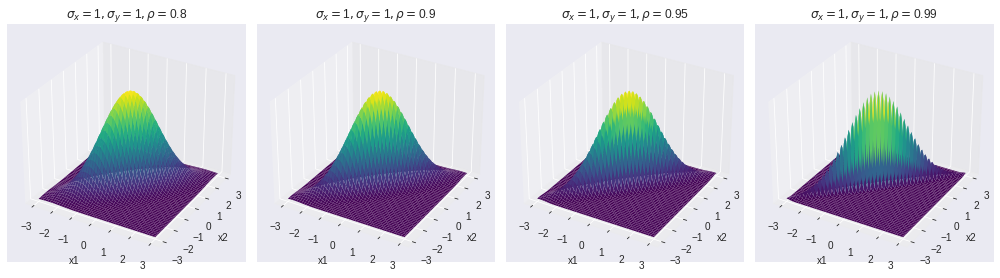

In [2]:
# Importamos los módulos que vamos a utilizar

import numpy as np
import matplotlib.pyplot as plt

  
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure()

# Definimos la grilla que vamos a usar
x = np.linspace(-3, 3, num=100)
y = np.linspace(-3, 3, num=100)
X, Y = np.meshgrid(x,y)

# Lista conteniendo los valores del coeficiente de correlación rho
#rho_val = [-0.8, 0, 0.8]
rho_val = [0.8, 0.9, 0.95,0.99]

# Usamos una lista para guardar los valores calculados de la densidad
distribuciones1 = []

# Itreramos sobre los distintos valores de rho
for rho in rho_val:         
    # Consideramos la distribución normal bivariada con los parámetros elegidos
    normal = normal_bivariada(1,1,rho)
    distribuciones1.append(normal)
    
def dibujar_distribuciones(distribuciones):    
    # Itreramos sobre los distintos valores de rho
    for idx, dist in enumerate(distribuciones):
        dist.evaluar_densidad_en_una_grilla(X,Y)   
        # Plotting the density function values
        ax = fig.add_subplot(1,len(distribuciones),idx+1, projection = '3d')
        ax.plot_surface(X, Y, dist.densidad, cmap = 'viridis')
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title(r'$\sigma_x=$'+str(dist.sigma_x)+r'$,\sigma_y=$'+str(dist.sigma_y)+r'$,\rho=$'+str(dist.rho))
        ax.axes.zaxis.set_ticks([])
    plt.tight_layout()
    plt.show()    
            
dibujar_distribuciones(distribuciones1)        
        


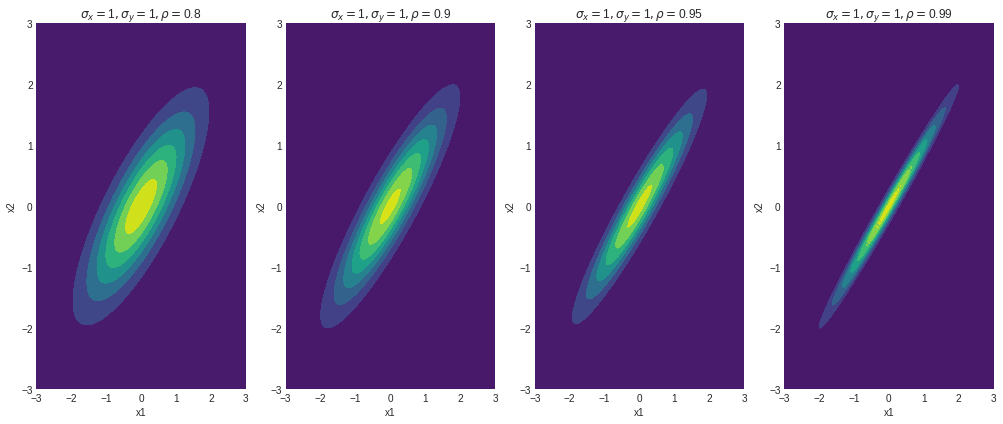

In [3]:
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6

# Graficamos las curvas de nivel (contornos)

def curvas_de_nivel(distribuciones):
    for idx,normal in enumerate(distribuciones):
        plt.subplot(1,len(distribuciones),idx+1)
        plt.contourf(X, Y, normal.densidad, cmap='viridis')
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.title(r'$\sigma_x=$'+str(normal.sigma_x)+r'$,\sigma_y=$'+str(normal.sigma_y)+r'$,\rho=$'+str(normal.rho))       
    plt.tight_layout()
    plt.show()
        
        
curvas_de_nivel(distribuciones1)        

## Generamos puntos al azar con distribución normal

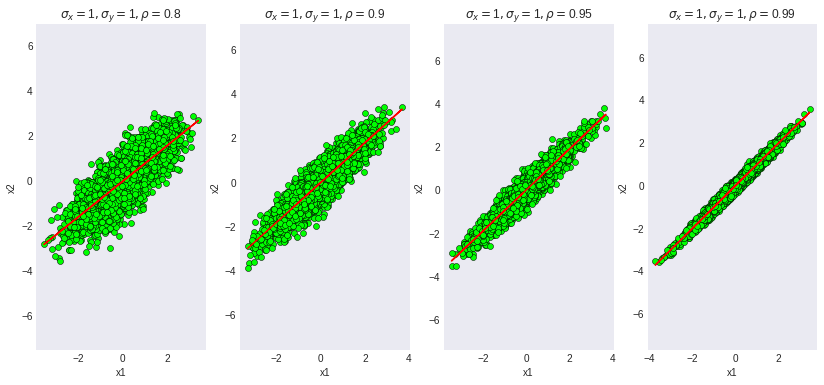

In [4]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6

# Vamos a usar los mismos parámetros que antes

# Semilla para iniciar el generador de números aleatorios
np.random.seed(1000)

def dibujar_puntos_al_azar(distribuciones,cuantos_puntos):
    for idx,normal in enumerate(distribuciones):
        ax=plt.subplot(1,len(distribuciones),idx+1)
        # Generamos 5000 puntos de la distribución
        data = normal.generar_al_azar(cuantos_puntos)
    
        x= data[:,0]
        y= data[:,1]
        ax.plot(x,y,'o', c='lime',
             markeredgewidth = 0.5,
            markeredgecolor = 'black')
        ax.set_xlim(-8.0,8.0)
        ax.set_ylim(-8.0,8.0)
        
        plt.title(r'$\sigma_x=$'+str(normal.sigma_x)+r'$,\sigma_y=$'+str(normal.sigma_y)+r'$,\rho=$'+str(normal.rho))       

        # dibujamos la recta de regresión
        regresion = linregress(x,y)
        alpha = regresion.slope 
        beta = regresion.intercept
        rho = regresion.rvalue
     
        # Dibujamos la recta de regresión
        y_predicho = alpha * x + beta
        ax.plot(x, y_predicho, color="r")
        
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.axis('equal')
    plt.show()

    
dibujar_puntos_al_azar(distribuciones1,5000)    

## Ahora variemos la varianza

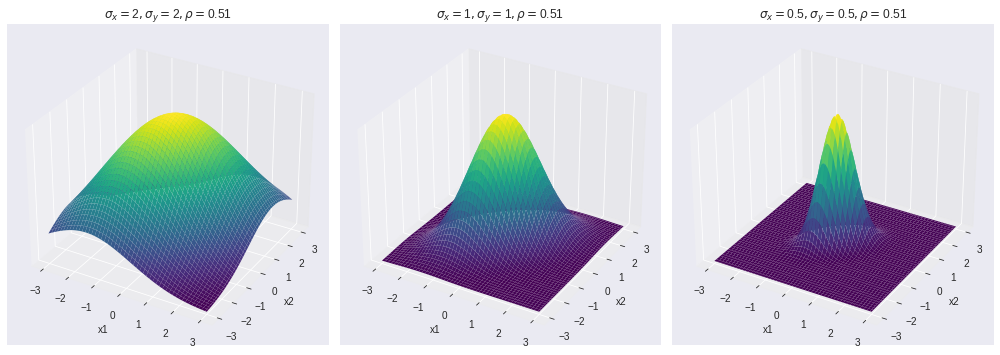

In [5]:
fig = plt.figure()

# Lista conteniendo los valores de sigma
sigma_val = [2,1,0.5 ]

# Usamos una lista para guardar los valores calculados de la densidad
distribuciones2 = []

# Itreramos sobre los distintos valores de rho
for sigma in sigma_val:         
    # Consideramos la distribución normal bivariada con los parámetros elegidos
    normal = normal_bivariada(sigma,sigma,0.51)
    distribuciones2.append(normal)


dibujar_distribuciones(distribuciones2)     



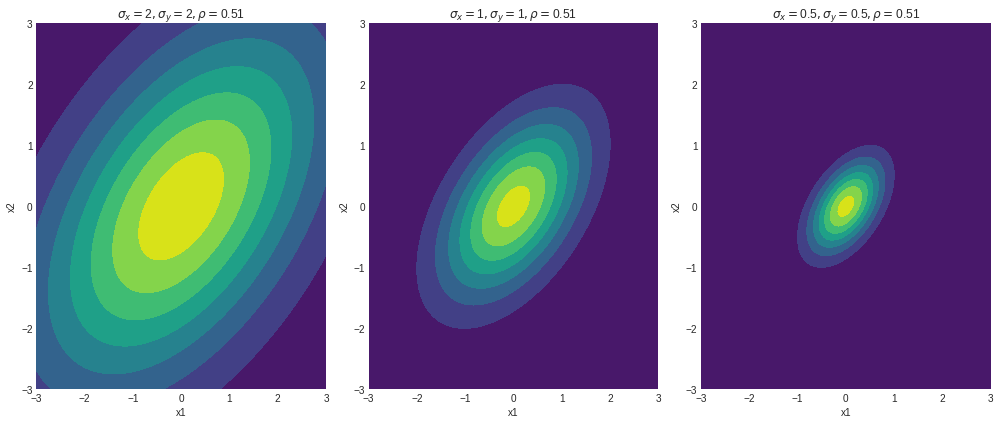

In [6]:
curvas_de_nivel(distribuciones2)

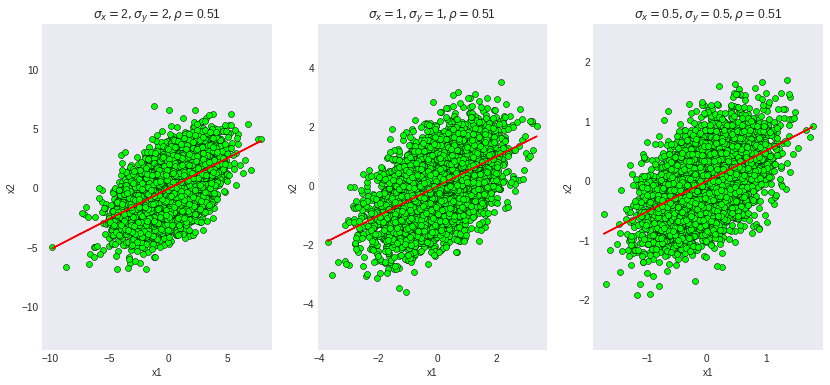

In [7]:
dibujar_puntos_al_azar(distribuciones2,5000)